In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Задание 1

In [10]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['iris_names'] = iris_df.target.apply(lambda i : iris.target_names[i])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Задание 2

Оставим два признака

In [54]:
two_feature_iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'target']]
two_feature_iris_df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [45]:
data_class = two_feature_iris_df.target

Задание 3

Разделяем выборку на тестевую и тренировочную. Оставим 30% на обучение


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(two_feature_iris_df, data_class, test_size=0.30)

Задание 4

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [48]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
lda.predict(X_test)

array([2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2])

In [40]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,target,Unnamed 0
118,2.0,NaN
104,2.0,NaN
30,0.0,0.0
8,0.0,2.0
133,2.0,NaN
50,1.0,NaN
33,0.0,1.0
57,1.0,NaN
111,2.0,NaN
35,0.0,2.0


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7777777777777778

Задание 5

In [55]:
lda.coef_

array([[-5.83028623,  8.86108526,  0.        ],
       [ 1.97211395, -4.71239488,  0.        ],
       [ 4.14312695, -4.53133085,  0.        ]])

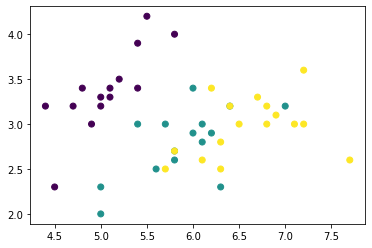

In [57]:
plt.scatter(x = X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], c=y_test)
plt.show()

In [58]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

In [59]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [60]:
lda_small.means_

array([[4.98611111, 3.44722222],
       [5.95428571, 2.76285714],
       [6.57941176, 2.97647059]])

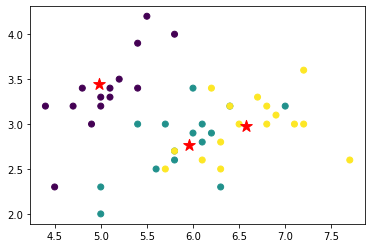

In [61]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

Задание 6

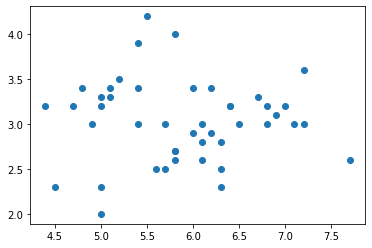

In [62]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'])
plt.show()

Задание 7

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
X_scaled = scaler.fit_transform(X_test)

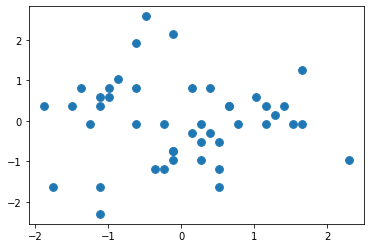

In [67]:
plt.scatter(X_scaled[:,0], X_scaled[:, 1], cmap='autumn', s=60)

In [68]:
from sklearn.cluster import KMeans

In [70]:
k_inertia = []

ks = range(2, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

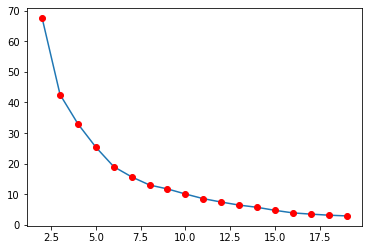

In [71]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [72]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       0])

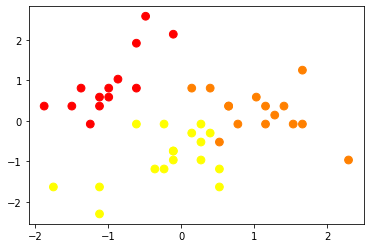

In [73]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)